<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Decision_Trees_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Decision Tree Regression for Car Price Prediction**

## **Objective**  
Train and evaluate a **Decision Tree Regression model** to predict car prices based on various features such as mileage, engine size, horsepower, etc.

---

## **Dataset**  
Download the **Car Price Prediction dataset** from Kaggle:  
🔗 [Car Price Prediction Dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)  

- Load the dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  

---

## **Tasks**  

### **1. Data Preprocessing**  
- Drop irrelevant columns such as "Car_Name" (if applicable).  
- Handle missing values appropriately.  
- Convert categorical features (e.g., fuel type, seller type) into numerical using **One-Hot Encoding** or **Label Encoding**.  
- Normalize numerical features using **StandardScaler**.  
- Split the dataset into **80% training and 20% testing**.  

---

### **2. Train Decision Tree Regression Model**  
- Train a **Decision Tree Regressor** with default parameters.  
- Evaluate its initial performance.  

---

### **3. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters:  
  - `max_depth` (Limit the depth of the tree)  
  - `min_samples_split` (Minimum samples required to split a node)  
  - `min_samples_leaf` (Minimum samples required at a leaf node)  

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Mean Squared Error (MSE)**  
  - **Mean Absolute Error (MAE)**  
  - **R² Score**  

---

### **5. Visualization**  
- Plot **Actual vs. Predicted values** for the Decision Tree model.  
- Plot a **feature importance graph** to analyze which features contribute the most to car price prediction.  

---

## **Submission Guidelines**  
- Submit a **colab Notebook (.ipynb)** with code and visualizations.  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [4]:
# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null

**Step 2: Data Preprocessing**

In [5]:
# Drop irrelevant columns
df = df.drop(['car_ID', 'CarName'], axis=1, errors='ignore')

In [6]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

In [7]:
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [8]:
# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [9]:
# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train initial Decision Tree model
dt_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

In [10]:
# Evaluate initial model
print("\nInitial Model Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")


Initial Model Performance:
MSE: 8223686.70
MAE: 1847.43
R²: 0.90


In [11]:
# Evaluate initial model
print("\nInitial Model Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")


Initial Model Performance:
MSE: 8223686.70
MAE: 1847.43
R²: 0.90


In [12]:
# Step 5: Hyperparameter tuning
param_grid = {
    'regressor__max_depth': [None, 5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [13]:
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_dt = grid_search.best_estimator_
y_pred_tuned = best_dt.predict(X_test)

In [14]:
# Evaluate tuned model
print("\nTuned Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_tuned):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tuned):.2f}")
print(f"R²: {r2_score(y_test, y_pred_tuned):.2f}")


Tuned Model Performance:
Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
MSE: 8557612.17
MAE: 2088.30
R²: 0.89


**Step 6: Visualization**

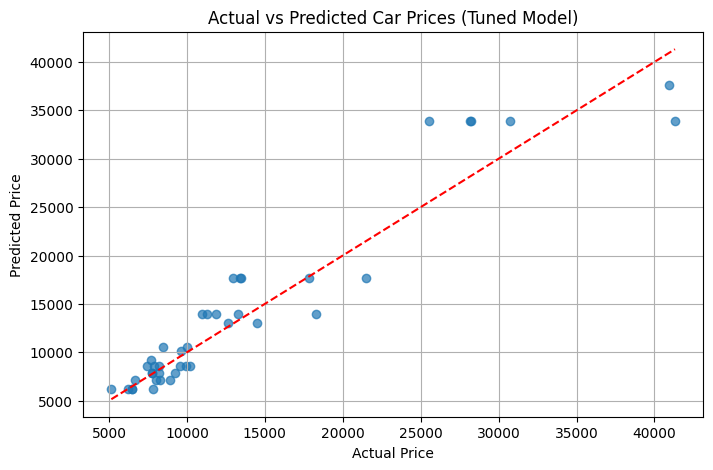

In [17]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_tuned, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices (Tuned Model)')
plt.grid(True)
plt.show()

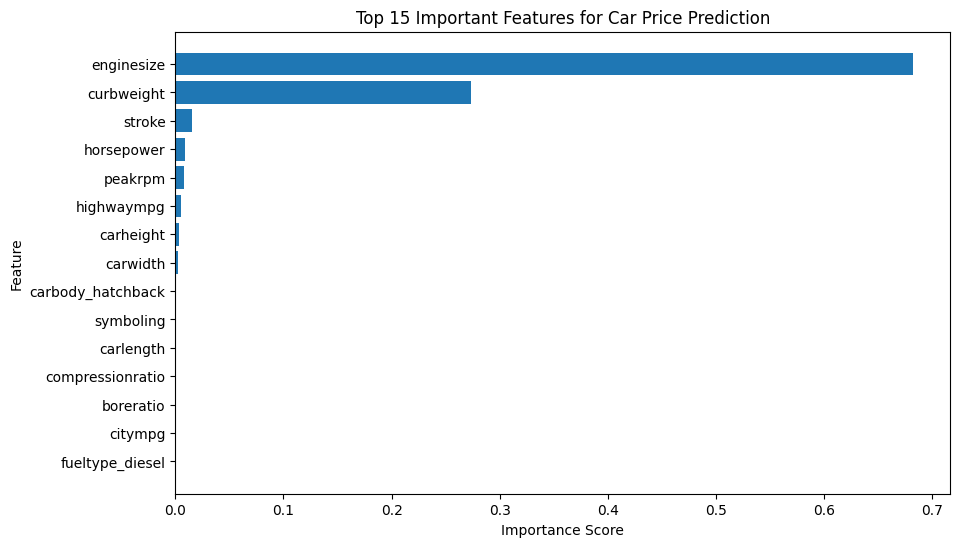

In [19]:
# Feature importance
# Get feature names after one-hot encoding
encoder = best_dt.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_features = encoder.get_feature_names_out(categorical_cols)
all_features = np.concatenate([numerical_cols, cat_features])

# Get feature importances
importances = best_dt.named_steps['regressor'].feature_importances_

# Create DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values('Importance', ascending=False).head(15)  # Show top 15 features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 15 Important Features for Car Price Prediction')
plt.gca().invert_yaxis()
plt.show()


In [20]:

# Step 7: Now Making sample prediction
sample_car = X.iloc[0:1].copy()  # Taking first car as example
sample_pred = best_dt.predict(sample_car)
print(f"\nSample Prediction for first car in dataset:")
print(f"Actual Price: ${y.iloc[0]:.2f}")
print(f"Predicted Price: ${sample_pred[0]:.2f}")


Sample Prediction for first car in dataset:
Actual Price: $13495.00
Predicted Price: $13923.92
